1

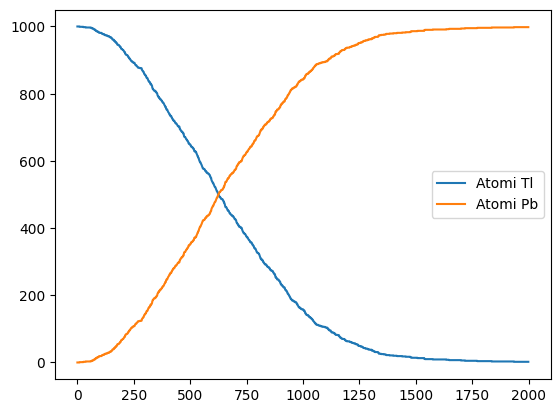

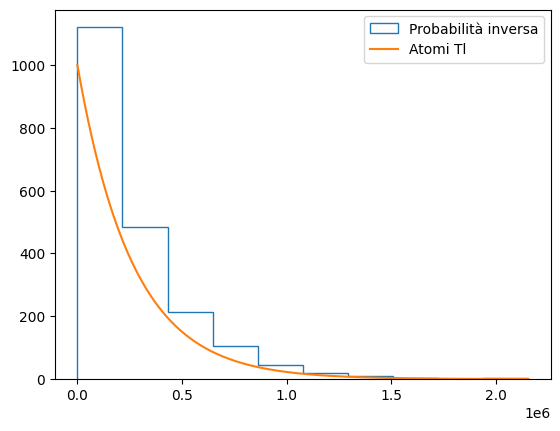

In [1]:
import numpy as np
import matplotlib.pyplot as plt

tau = 3052 * 60  
num_atomi = 1000  

tl_atomi = [num_atomi]
pb_atomi = [0]

def p(t, tau):
    return 1 - 2**(-t/tau)

N_steps = 2000


for t in range(1, N_steps):

    atomi = np.random.random(tl_atomi[-1])
    
    decayed = np.sum(atomi < p(t, tau)) 
    
    
    tl_atomi.append(tl_atomi[-1] - decayed)
    pb_atomi.append(pb_atomi[-1] + decayed)
    
plt.plot(tl_atomi, label = "Atomi Tl")
plt.plot(pb_atomi, label = "Atomi Pb")
plt.legend()
plt.show()


def inverse_p2(x):
    return -tau*np.log2(1 - x)

un = np.random.random(N_steps)
x = inverse_p2(un)


plt.hist(x, histtype = 'step', label="Probabilità inversa")
plt.plot(np.sort(x), (1 - (np.sort(un)))*1000, label = "Atomi Tl")
plt.legend()
plt.show()


2

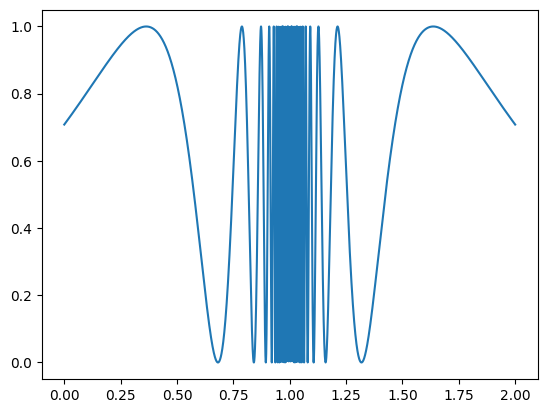

Mean of integral of f(x) with hit and miss method: 1.3467760000000002
Standard Deviation of integral of f(x) with hit and miss method: 0.0008729365612689163

Mean of integral of f(x) with mean value method: 1.3466305471738107

Integral reference value calculated with trapz: 1.3476352527116469
Error with hit and miss method: 0.0008592527116466631
Error with mean value method: 0.0010047055378361591

The hit-miss method is more accurate


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(1/(1-x))**2

N = 10000

x = np.linspace(0, 2, N)
y = f(x)
plt.plot(x, y)
plt.show()



integrali = []
step = 100

for a in range(step):
    count = 0
    for i in range(N):
        x = 2 * np.random.random() 
        y = np.random.random()     
        if y < f(x): count += 1
    I = 2 * count / N
    integrali.append(I)

media = np.mean(integrali) 
dev = np.std(integrali)/np.sqrt(step) 

print(f"Mean of integral of f(x) with hit and miss method: {media}")
print(f"Standard Deviation of integral of f(x) with hit and miss method: {dev}")



x_casuali = np.random.uniform(0, 2, N)
y_casuale = f(x_casuali)
media_2 = 2*np.mean(f(x_casuali)) 
dev_2 = np.std(y_casuale)/np.sqrt(N) 
print(f"\nMean of integral of f(x) with mean value method: {media_2}")

x = np.linspace(0, 2, N)
Integral_ref = np.trapz(f(x) ,x)

err_hitmiss = np.abs(Integral_ref-media)
err_meanval = np.abs(Integral_ref-media_2)

print(f"\nIntegral reference value calculated with trapz: {Integral_ref}")
print(f"Error with hit and miss method: {err_hitmiss}")
print(f"Error with mean value method: {err_meanval}")

if(err_meanval > err_hitmiss):
    print("\nThe hit-miss method is more accurate")
else: 
    print("\nThe mean value method is more accurate")

3

In [1]:
import numpy as np

N = 100000


x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)

count = 0
for i in range(N):
    if x[i]**2 + y[i]**2 <= 1:
        count += 1

area = 4*count/N
print("The area of the circle with r=1 is :", area)


D = 10

x_D = np.random.uniform(-1, 1, (N, D))

count_D = 0
for i in range(N):
    s = 0
    for j in range(D):
        s += x_D[i, j]**2
    if s <= 1:
        count_D += 1

area_D = (2**D*count_D)/N

print(f"The area of the sphere of dimension {D} is: {area_D}")

The area of the circle with r=1 is : 3.14792
The area of the sphere of dimension 10 is: 2.37568


4

In [3]:

def f(x):
    return (x**(-1/2))/(np.exp(x)+1)


def w(x):
    return 1/np.sqrt(x)

N = 100000

x0 = np.random.random(N) #tra 0 e 1
w_integral = np.sum(w(x0))/N

x_1 = np.random.uniform(0, 1, N)**2
I_res = (np.sum(f(x_1)/w(x_1))*w_integral)/N

print(f"The integral value is {I_res}")

The integral value is 0.8302837482353321
